For regression problems, we typically have many more cases (*n*, or rows of *X*) than features to predict (columns of *X*).
Let's solve a miniature example of such an overdetermined situation.

We have eight data points (*n* = 8):

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x1 = [0,1,2,3,4,5,6,7.] # Eg. Dosage of drug for treating Alzheimer's disease
y = [1.86,1.31,.62,.33,.09,-.67,-1.23,-1.37] # Eg. Patient's "forgetfulness score" 

In [7]:
title = "Clinical Trial"
xlabel = "Drug dosage(ml)"
ylabel = "Forgetfulness"

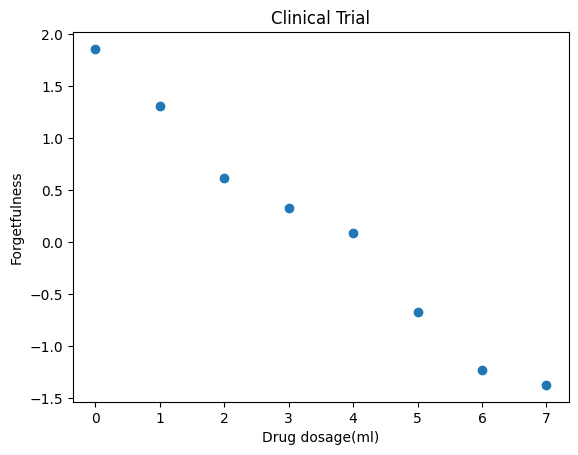

In [8]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(x1,y)

In [9]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate *x0* and *x1* into a matrix *X*:

In [10]:
X = np.concatenate((np.matrix(x0).T,np.matrix(x1).T),axis=1)
X

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

we know that we can calculate the weights *w* using the eqaution *w* = *X^+y*:

In [13]:
w = np.dot(np.linalg.pinv(X),y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight corresponds to the *y*-intercept of the line, which is typically denoted as *b*:

In [14]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as *m*: 

In [15]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

With the weights we can plot the line to confirm it fits the points:

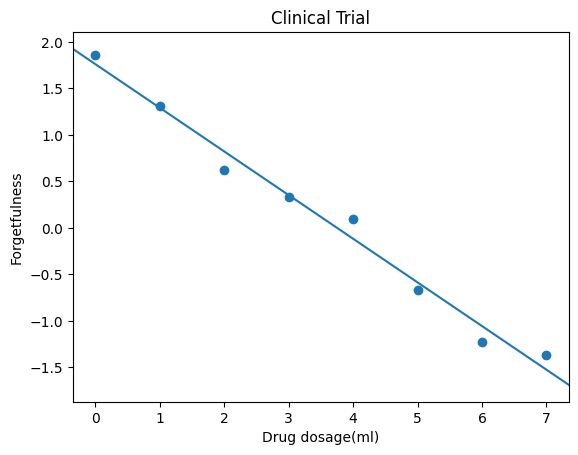

In [16]:
fig, ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(x1,y)

x_min, x_max = ax.get_xlim()
y_min, y_max = m*x_min + b, m*x_max + b

ax.set_xlim([x_min,x_max])
ax.plot([x_min,x_max],[y_min,y_max])